<a href="https://colab.research.google.com/github/Joytu/ARIMA-for-predicting-inflation-in-Bangladesh/blob/main/Copy_of_ARIMA_monthly498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/cse498r/clean/datasetf_1 - cpi_month.csv', parse_dates=True)
df.shape

(118, 3)

In [ ]:
df.head(10)
#df2=df.copy(deep=False)

,Date,CPI,Inflation
0,01/01/2013,184.33,6.62
1,01/02/2013,184.79,7.84
2,01/03/2013,185.01,7.71
3,01/04/2013,185.13,8.37
4,01/05/2013,182.91,7.98
5,01/06/2013,184.04,8.05
6,01/07/2013,186.79,7.85
7,01/08/2013,189.44,7.39
8,01/09/2013,192.24,7.13
9,01/10/2013,194.01,7.03


In [ ]:
df.dtypes


Date          object
CPI          float64
Inflation    float64
dtype: object

In [ ]:
df2=df.copy(deep=False)
df2.dtypes

Date          object
CPI          float64
Inflation    float64
dtype: object

In [ ]:
df2.head(10)

,Date,CPI,Inflation
0,01/01/2013,184.33,6.62
1,01/02/2013,184.79,7.84
2,01/03/2013,185.01,7.71
3,01/04/2013,185.13,8.37
4,01/05/2013,182.91,7.98
5,01/06/2013,184.04,8.05
6,01/07/2013,186.79,7.85
7,01/08/2013,189.44,7.39
8,01/09/2013,192.24,7.13
9,01/10/2013,194.01,7.03


Converting Year column to Datetime format

In [ ]:
df2['Date']= pd.to_datetime(df2['Date'], dayfirst=True)
df2.head(15)

,Date,CPI,Inflation
0,2013-01-01,184.330,6.62
1,2013-02-01,184.790,7.84
2,2013-03-01,185.010,7.71
3,2013-04-01,185.130,8.37
4,2013-05-01,182.910,7.98
5,2013-06-01,184.040,8.05
6,2013-07-01,186.790,7.85
7,2013-08-01,189.440,7.39
8,2013-09-01,192.240,7.13
9,2013-10-01,194.010,7.03


In [ ]:
df2.dtypes

Date         datetime64[ns]
CPI                 float64
Inflation           float64
dtype: object

In [ ]:
df2['Date'].nunique()
monthly=df2.copy()

KeyError: ignored

**Add visualizations later**

ValueError: ignored

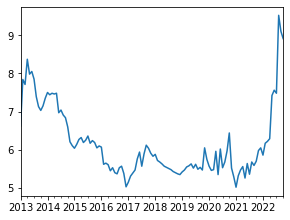

In [ ]:
#df2['CPI']=round((df2['CPI'].pct_change().fillna(0))*100,2)
df2.iloc[:, 1:13].plot(kind='line',subplots=True,figsize=(16,16),title=['CPI','Inflation'],legend=False,layout=(4,3),
                       sharex=True,
                       )

In [ ]:
df2= df2.set_index('Date')

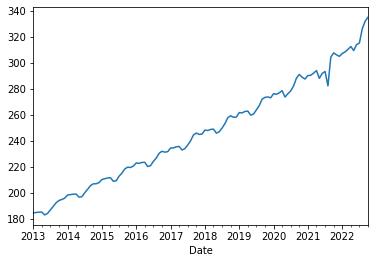

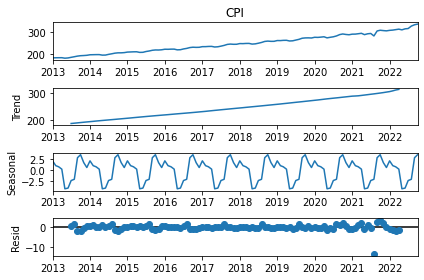

In [ ]:
df2['CPI'].plot()
fig= seasonal_decompose(df2['CPI'],model='additive').plot()

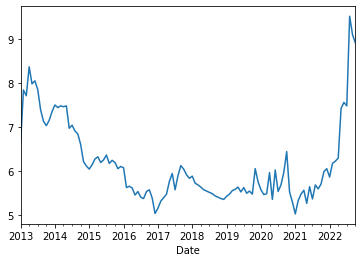

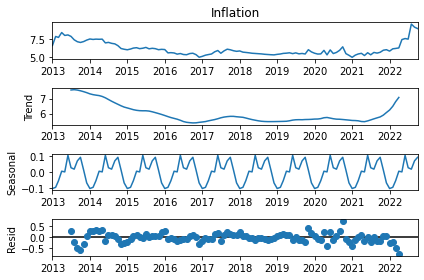

In [ ]:
df2['Inflation'].plot()
fig= seasonal_decompose(df2['Inflation'],model='additive').plot()

In [ ]:
dftest= adfuller(df2['Inflation'], autolag="AIC")
dfoutput= pd.Series(dftest[0:4],index=['Test Stats', 'p-value','#lags', '# of obs'])
for key,value in dftest[4].items():
  dfoutput[f"Critical Value ({key})"] = value
print(dfoutput)


Test Stats               -1.193429
p-value                   0.676416
#lags                     6.000000
# of obs                111.000000
Critical Value (1%)      -3.490683
Critical Value (5%)      -2.887952
Critical Value (10%)     -2.580857
dtype: float64


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df2["1st_diff"] = df2["Inflation"].diff()
df2["2nd_diff"] = df2["1st_diff"].diff()

fig = make_subplots(rows=2, cols=1)

for idx, d in enumerate(["1st_diff", "2nd_diff"]):
    fig.add_trace(
        go.Scatter(
            name = d,
            x = df2.index,
            y = df2[d]
        ),
        row=idx+1,col=1
    )
fig.update_layout(
    title="Differnced plots"
)
fig.show()

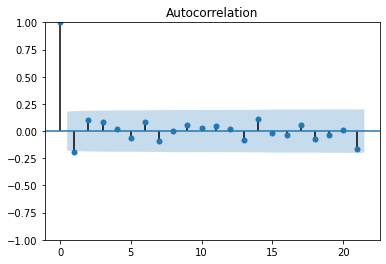

In [ ]:
plot_acf(df2["1st_diff"].dropna());

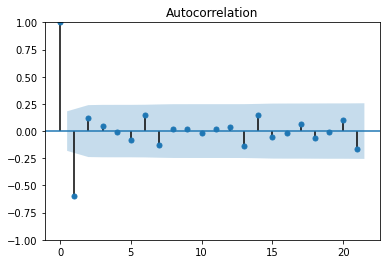

In [ ]:
plot_acf(df2["2nd_diff"].dropna());

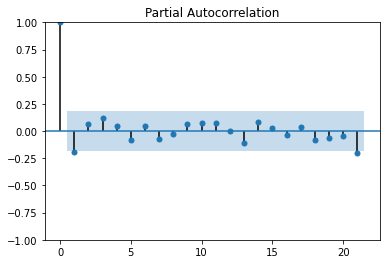

In [ ]:
plot_pacf(df2["1st_diff"].dropna());

In [ ]:
import pmdarima as pm

In [ ]:
stepwise_fit = pm.auto_arima(df2['Inflation'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84.768, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=82.076, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=82.938, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83.151, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83.510, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=83.801, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=84.277, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=80.573, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=81.949, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=82.268, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=81.430, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=82.777, Time=0.34 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.744 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -38.286
Date:                Wed, 01 Feb 2023   AIC                             80.573
Time:                        12:53:13   BIC                             86.097
Sample:                    01-01-2013   HQIC                            82.815
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2068      0.113     -1.833      0.067      -0.428       0.014
sigma2         0.1126      0.006     19.416      0.000       0.101       0.124
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               723.61
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                             2.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = pm.auto_arima(df2['CPI'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=602.703, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=606.904, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=607.877, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.585, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=622.625, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=605.750, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=604.706, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=604.687, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=602.654, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=606.810, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=597.047, Time=0.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=599.527, Time=0.23 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=593.686, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(2, 1, 5)   Log Likelihood                -287.843
Date:                Wed, 01 Feb 2023   AIC                            593.686
Time:                        12:53:26   BIC                            618.545
Sample:                    01-01-2013   HQIC                           603.778
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4399      0.205      2.144      0.032       0.038       0.842
ar.L1          1.1759      0.176      6.667      0.000       0.830       1.522
ar.L2         -0.5138      0.235     -2.191      0.028      -0.973      -0.054
ma.L1         -1.3998      0.145     -9.647      0.000      -1.684      -1.115
ma.L2          0.5583      0.194      2.878      0.004       0.178       0.938
ma.L3          0.1036      0.131      0.791      0.429      -0.153       0.361
ma.L4         -0.4517      0.134     -3.371      0.001      -0.714      -0.189
ma.L5          0.4535      0.086      5.266      0.000       0.285       0.622
sigma2         7.7887      0.795      9.798      0.000       6.231       9.347
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               465.91
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              11.62   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



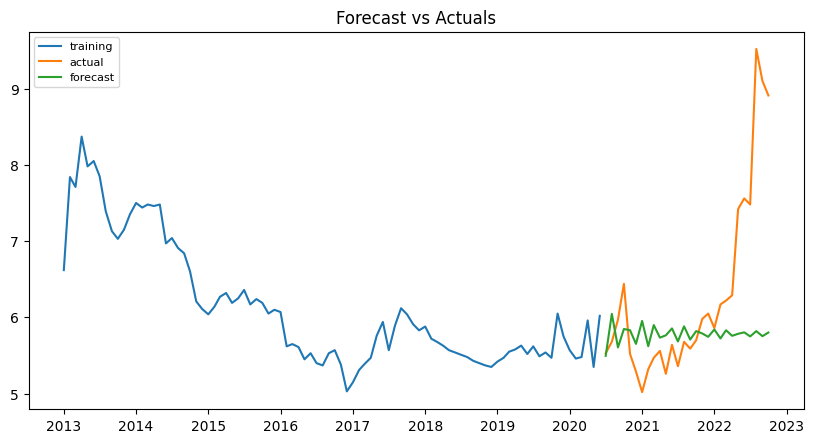

In [ ]:
x=df2['Inflation']
split=90
train,test=x[0:split],x[split:]
# test,train=x[0:split],x[split:]

model = ARIMA(train, order=(2, 1, 2))
fit_model = model.fit()

fc = fit_model.forecast(len(test)) # 95% conf

# fc = fit_model.forecast(20, alpha=0.05) # 95% conf
# fc,conf = fit_model.forecast(203, alpha=0.05)  # 95% conf

fc_series= pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                     color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test,fc))
print(rms)

1.2896379231115553


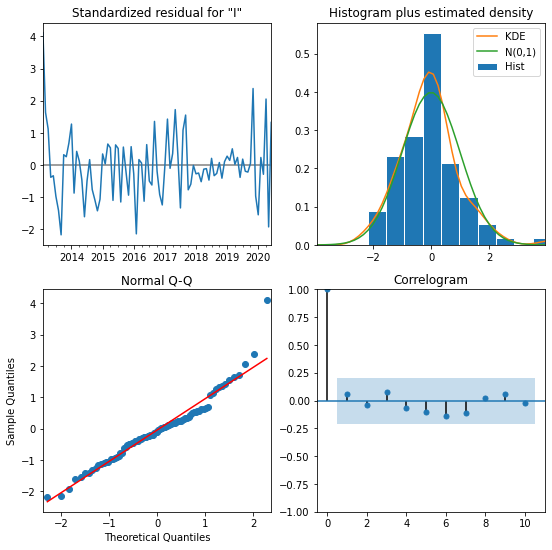

In [ ]:
fit_model.plot_diagnostics(figsize=(9,9))
plt.show()

In [ ]:
forecast = fit_model.predict(start=0, end=len(df) + 4, typ='levels', dynamic=False)

In [ ]:
forecast.tail()

2022-11-01    5.780773
2022-12-01    5.773396
2023-01-01    5.802523
2023-02-01    5.762010
2023-03-01    5.802412
Freq: MS, Name: predicted_mean, dtype: float64

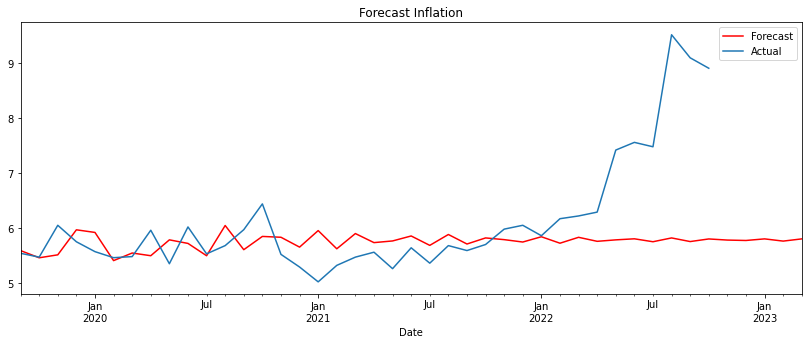

In [ ]:
forecast.iloc[80:].plot(legend=True, label='Forecast', figsize=(14,5), color='red')
df2['Inflation'].iloc[80:].plot(legend=True, label='Actual')
plt.title('Forecast Inflation')
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



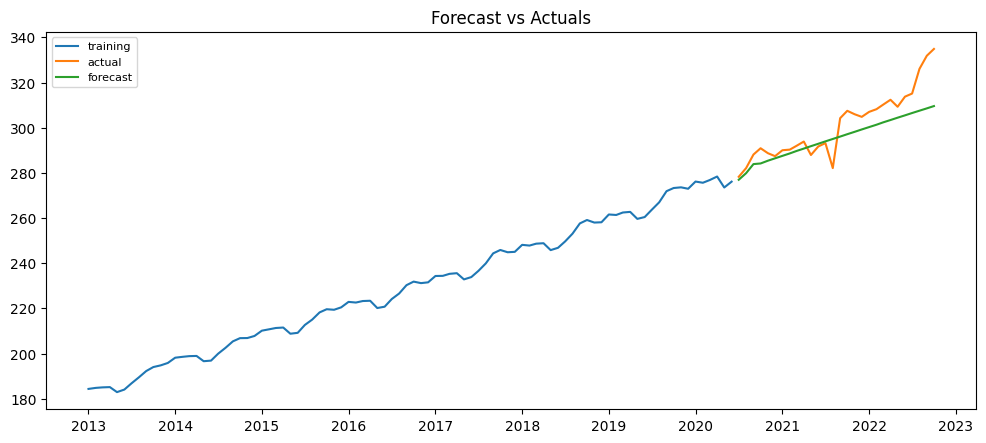

In [ ]:
x=df2['CPI']
split=90
train,test=x[0:split],x[split:]
# test,train=x[0:split],x[split:]

model = ARIMA(train, order=(2, 1, 5))
fit_model2 = model.fit()

fc = fit_model2.forecast(len(test)) # 95% conf

# fc = fit_model.forecast(20, alpha=0.05) # 95% conf
# fc,conf = fit_model.forecast(203, alpha=0.05)  # 95% conf

fc_series= pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                     color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast = fit_model2.predict(start=0, end=len(df) + 4, typ='levels', dynamic=False)

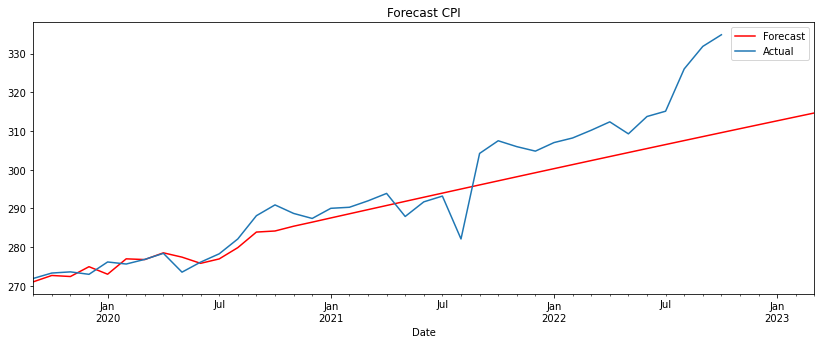

In [ ]:
forecast.iloc[80:].plot(legend=True, label='Forecast', figsize=(14,5), color='red')
df2['CPI'].iloc[80:].plot(legend=True, label='Actual')
plt.title('Forecast CPI')
plt.show()